In [1]:
import statsmodels.api as sm
import pandas as pd

In [2]:
marketing = pd.read_csv("marketing.csv")
marketing.head(5)

,Unnamed: 0,youtube,facebook,newspaper,sales
0,1,276.12,45.36,83.04,26.52
1,2,53.40,47.16,54.12,12.48
2,3,20.64,55.08,83.16,11.16
3,4,181.80,49.56,70.20,22.20
4,5,216.96,12.96,70.08,15.48


In [6]:
model = sm.OLS.from_formula('sales ~ youtube', marketing)
results = model.fit()

# calculate the predicted values and residuals

marketing['Predicted'] = results.predict(marketing)
marketing['residuals'] = marketing['sales'] - marketing['Predicted']
marketing.head(5)

,Unnamed: 0,youtube,facebook,newspaper,sales,Predicted,residuals
0,1,276.12,45.36,83.04,26.52,21.564929,4.955071
1,2,53.40,47.16,54.12,12.48,10.977569,1.502431
2,3,20.64,55.08,83.16,11.16,9.420269,1.739731
3,4,181.80,49.56,70.20,22.20,17.081273,5.118727
4,5,216.96,12.96,70.08,15.48,18.752662,-3.272662


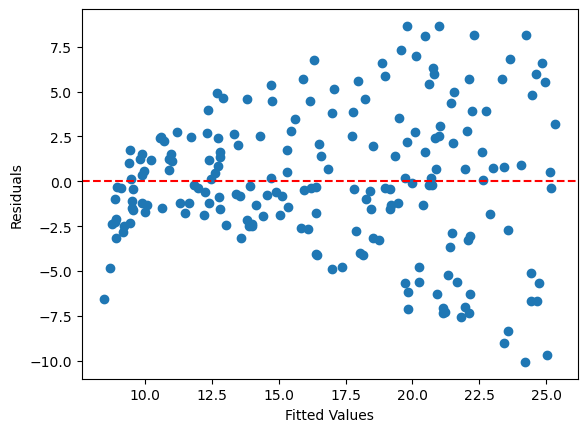

In [7]:
import matplotlib.pyplot as plt
plt.scatter(marketing['Predicted'], marketing['residuals'])
plt.axhline(y = 0, color = 'red', linestyle = 'dashed')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [10]:
model = sm.OLS(marketing['sales'],sm.add_constant(marketing['youtube']))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           1.47e-42
Time:                        11:02:16   Log-Likelihood:                -555.51
No. Observations:                 200   AIC:                             1115.
Df Residuals:                     198   BIC:                             1122.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4391      0.549     15.360      0.0

In [18]:
corr = (marketing['sales'].corr(marketing['youtube']) ** 2)
corr

0.6118750508500709

In [11]:
model = sm.OLS(marketing['sales'],sm.add_constant(marketing['facebook']))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Fri, 28 Jul 2023   Prob (F-statistic):           4.35e-19
Time:                        11:05:09   Log-Likelihood:                -609.80
No. Observations:                 200   AIC:                             1224.
Df Residuals:                     198   BIC:                             1230.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.1740      0.675     16.542      0.0

In [12]:
model = sm.OLS(marketing['sales'],sm.add_constant(marketing['newspaper']))
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Fri, 28 Jul 2023   Prob (F-statistic):            0.00115
Time:                        11:06:00   Log-Likelihood:                -644.80
No. Observations:                 200   AIC:                             1294.
Df Residuals:                     198   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.8217      0.746     19.876      0.0

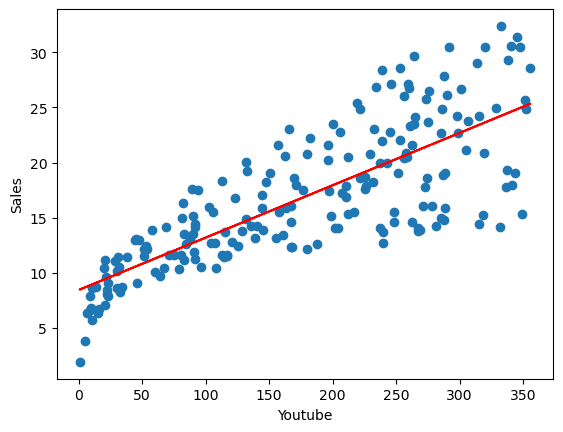

In [9]:
plt.scatter(marketing['youtube'], marketing['sales'])
plt.plot(marketing['youtube'], results.fittedvalues, color = 'red')
plt.xlabel('Youtube')
plt.ylabel('Sales')
plt.show()